![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1: Bisseção ao infinito

Uma outra forma de encontrar raizes de $x e^x = y$ consiste em fazer uma bisseção "até o infinito".
Vejamos como isso se aplica no caso de $+\infty$.

Como há um número **finito** de números de ponto flutuante que seu computador conhece,
podemos usar uma progressão geométrica para tentar chegar no infinito.

Se no intervalo $[a, a\cdot r]$ a função não trocar de sinal, podemos tentar o intervalo
$[a\cdot r, a\cdot r^2]$, e depois o intervalo $[a\cdot r^2, a\cdot r^3]$ e assim sucessivamente.

## Questão 1.1: PGs ao infinito

Escreva uma função que calcula o comprimento da PG $a r^n$ até chegar no infinito.

In [2]:
def comprimento_pg(a, r):
    """Comprimento da PG de razão  r  começando em  a,  até chegar no +infinito de ponto flutuante"""
    assert a > 0 and r > 1
    a, r = float(a), float(r)
    new_r = r
    inf = float("inf")
    count =0
    while a*new_r != inf:
      new_r = new_r *r
      count +=1
    return count

In [3]:
assert 1000 < comprimento_pg(1, 2.) < 2000

In [4]:
assert 250 < comprimento_pg(1, 10.) < 350

In [5]:
assert 250 < comprimento_pg(1e10, 10.) < 350

## Questão 1.2: Máximo de bisseções

Quantas bisseções é possível fazer em um intervalo $[a,b]$ até chegar no limite de precisão do computador?

In [6]:
def bissect_max(a, b):
    """Conta o número de bisseções no intervalo  [a, b]  até chegar na precisão de representação."""
    nbiss = 0
    distance = abs(a-b)
    counter = 0
    while counter<200:
      counter += 1
      distance/=2 
      if a+distance ==a:
        break
    return counter

In [7]:
assert 50 <= bissect_max(1, 2) <= 56
assert 50 <= bissect_max(1, 4) <= 56

In [8]:
assert bissect_max(1,8) >= bissect_max(1,4)
assert bissect_max(1,8) >= bissect_max(2,8)

In [9]:
assert bissect_max(1,8) >= bissect_max(3,8)

Porque é sempre verdade que `bissect_max(a,b) >= bissect_max(c,d)` se $[c,d] \subset [a,b]$?

Porque quanto menor for a distância em um intervalo $[a,b]$ dado de entrada para a função bissect_max($a$, $b$), menos iterações serão necessárias até que se chegue no limite de precisão do computador, ou seja, mesmo que o método da bisseção continue fazendo divisões por $2$, a raiz encontrada não sofrerá alteração de acordo com a precisão. 


Portanto, considerando o intervalo $[c,d] \subset [a,b]$, temos como consequência que a distância no intervalo $[c,d]$, representada por $|d-c|$, deve ser menor ou igual a $|b-a|$. Desse modo, serão necessarias menos interações no resultado de bissect_max($c$, $d$), sendo o límite superior dado pelo número de iterações de bissect_max($a$, $b$).

## Questão 1.3: Calibrando duas bisseções

Qual razão $r$ da PG você usaria para encontrar uma raiz positiva,
levando em conta
- o número de bisseções para encontrar o intervalo; e
- o número de bisseções para encontrar a raiz dentro do intervalo?

Explique sua ideia na caixa abaixo, e faça as contas necessárias na caixa seguinte.

O ideal entre as duas operações é encontrar uma razão $r$ que satisfaça ambas as funções sem que o número de iterações seja muito discrepante. 
Este é o ideal porque, quanto maior for o valor de $r$, menos bisseções serão necessárias para se encontrar o intervalo, enquanto, como vimos acima, quanto maior for o intervalo analisado na bisseção, mais iterações serão necessárias para se encontrar uma raiz dentro da precisão do computador.
Assim, o ideal é achar um equilíbrio, de modo que a ordem de grandeza do número de iterações em ambas as funções seja parecido. 

Para encontrar um $r$ mais próximo do valor ideal, decidimos incrementar de $1$ em $1$. Assim, o menor $r$ encontrado, no exemplo que analisamos, levando em conta o trade-off entre o número de bisseções para encontrar o intervalo e o número de bisseções para encontrar a raiz dentro desse intervalo, foi $r=25331$.

In [10]:
def calibracao(a, r):
  n = comprimento_pg(a,r)
  while comprimento_pg(a, r) > bissect_max(a*r**(n-1), a*r**(n)):
    r += 1
    n = comprimento_pg(a,r)
  return comprimento_pg(a, r), bissect_max(a*r**(n-1), a*r**(n)), r

c_pg, c_bis, new_r = calibracao(1,2.)
print(c_pg, c_bis, new_r)

69 69 25331.0


## Questão 1.4: "Fase 0"

Agora, implemente uma função que encontra um intervalo onde há uma raiz de $f(x) = y$,
sabendo que há uma raiz no intervalo $[1, +\infty)$.

In [11]:
def fase0(f, y):
    """Retorna um intervalo onde há uma raiz de  f(x) = y."""
    a, r =1,2
    while comprimento_pg(a, r) > bissect_max(a, a*r): 
      r+= 1
    ar = a*r
    while (f(a)-y) * (f(ar)-y) > 0:
      a,ar = ar, ar*r 
    return (a,ar)

In [12]:
def sqr(x):
    return x**2

a, b = fase0(sqr, 10)
assert sqr(a) <= 10 <= sqr(b) or sqr(b) <= 10 <= sqr(a)

In [13]:
def slow_pot(x):
    return x**0.1

a, b = fase0(slow_pot, 10)
assert slow_pot(a) <= 10 <= slow_pot(b) or slow_pot(b) <= 10 <= slow_pot(a)

In [14]:
def cauchy(x):
    return 1/(1 + x**2)

a, b = fase0(cauchy, 1e-10)
assert cauchy(a) <= 1e-10 <= cauchy(b) or cauchy(b) <= 1e-10 <= cauchy(a)

Agora, modifique a `fase0` para receber valores de $a$ e $r$ quaisquer.
Isso permitirá começar a busca tanto para valores positivos como negativos,
e também "no infinito" ou "perto de zero".

In [15]:
def fase0_geral(f, y, a, r):
    """Retorna um intervalo contendo uma raiz de  f(x) = y,  usando a PG de termo inicial  a  e razão  r."""
    assert a != 0
    assert r > 0 and abs(r) != 1
    ar = a*r
    while (f(a)-y) * (f(ar)-y) > 0:
      a,ar = ar, ar*r 
    return (a,ar)

Explique os `assert`s iniciais.

Os asserts que estão nas células após a definição da função $fase0$, estão garantindo que os valores $a$ e $b$ retornados, representam um intervalo $[a,b]$ que contém a raiz da função $f(x) = y$.

Após a modificação da função fase0 para fase0_geral, são incluidos os asserts para $a \neq 0$, pois, a função definida anteriormente para encontrar o intervalo, possui o intervalo dado por $[a*r^{n-1}, a*r^n]$, e caso $a=0$, teremos que o intervalo será sempre $[0,0]$, pois qualquer valor multiplicado por $a$ resultará em $0$. A mesma lógica se aplica ao caso em que $r=0$

Além disso, também devemos garantir que a razão seja $r\neq 1$, pois, para esse valor, o intervalo encontrado não sofreria alteração ao longo das iterações, pois qualquer valor multiplicado por $1$, é ele mesmo, e o intervalo resultante seria dado sempre por $[a,a]$.

Também devemos garantir que a razão $r$ não tenha um valor negativo, já que isso modificaria radicalmente os intervalos a cada iteração, fazendo uma alternância entre valores positivos e negativos:$[a, -a|r|] \rightarrow [-a|r|, ar^2]$. Desse modo, o intervalo muda de sentido a cada iteração, o que não é interessante no nosso caso, pois sabemos que a raiz deve estar no intervalo $[1,+ \infty)$.

In [16]:
a, b = fase0_geral(sqr, 10, -1, 2)
assert sqr(a) <= 10 <= sqr(b) or sqr(b) <= 10 <= sqr(a)

In [17]:
def xlogx(x):
    return x * np.log(x)

a, b = fase0_geral(xlogx, -1e-20, 0.5, 0.1)
assert xlogx(a) <= -1e-20 <= xlogx(b) or xlogx(b) <= -1e-20 <= xlogx(a)

## Questão 1.5: Bisseção final

Modifique o código da Bisseção para encontrar a raiz de $f(x) = y$, até a precisão do computador,
a partir dos termos de uma PG.

Retorne, também, o número de pontos onde você terá avaliado $f$ - isso vai necessitar alterar a função de fase 0.

In [18]:
def fase0_geral(f, y, a, r):
    """Retorna um intervalo contendo uma raiz de  f(x) = y,  usando a PG de termo inicial  a  e razão  r."""
    assert a != 0
    assert r > 0 and abs(r) != 1
    # YOUR CODE HERE
    ar = a*r
    temp_fa = f(a)-y
    temp_far = (f(ar)-y)
    while temp_fa * temp_far > 0:
      a,ar = ar, ar*r 
      temp_fa = temp_far
      temp_far = (f(ar)-y)
    return (a,ar)
    
def bisseção_PG(f, y, a, r):
    """Solução até a precisão da máquina para  f(x) = y."""
    # YOUR CODE HERE
    counter =0
    def new_f(x):
      nonlocal counter
      counter+=1
      return f(x)

    (a,b) = fase0_geral(new_f,y,a,r)
    x = (a+b)/2
    temp_f_x = (new_f(x)-y)
    temp_f_a = (new_f(a)-y)
    temp = temp_f_x*temp_f_a
    aux = a+b
    while temp_f_x!= 0:
        aux = x
        temp_f_x = (new_f((a+b)/2)-y)
        temp = temp_f_x*temp_f_a
        
        if temp < 0:
            b = x
        else:
            if temp == 0:
                break
            a = x
            temp_f_a = temp_f_x

        x = (a+b)/2
        #caso a raiz x nao sofra alteracao dentro da precisao do computador
        if (aux == x):
          return (x, counter)
        
    return (x, counter)

In [19]:
r, nevals = bisseção_PG(sqr, 1000, 1, 2)
assert abs(sqr(r) - 1000) < 1e-13
assert 50 <= nevals <= 100

In [20]:
r, nevals = bisseção_PG(xlogx, 1000, 1, 3)
assert abs(xlogx(r) - 1000) < 1e-3
assert 50 <= nevals <= 100

In [21]:
def xex(x):
    return x * np.exp(x)

r, nevals = bisseção_PG(xex, -1e-30, -1, 10)
assert abs(xex(r) + 1e-30) < 1e-40
assert 50 <= nevals <= 70

In [22]:
r, nevals = bisseção_PG(xlogx, -1e-20, 0.5, 0.1)
assert abs(xlogx(r) + 1e-20) < 1e-30
assert 50 <= nevals <= 100

Porque a tolerância dos últimos testes é tão pequena?

Como temos raizes muito pequenas nesses dois ultimos casos, a precisão relativa pode continuar a mesma e mesmo assim temos uma precisão absoluta muito maior, pois os números que estão sendo representados são muito pequenos. 

## Questão 1.6: Generalizando ainda mais

Como você adaptaria a busca de um intervalo para encontrar uma raiz de $f(x) = y$ para funções que não são monótonas?

Algumas ideias para pensar:

- $x \cos(x)$
- $x + \sin(x)$

Incluindo uma análise na derivada da função dentro da  $fase0$  (definição do intervalo onde se encontra uma raiz da função  $f$ ), ou seja, devemos analisar a que passo teriamos os mínimos e os máximos, para dividir o intervalo total em intervalos onde a função é monótona. O cálculo desses mínimos e máximos é feito ao encontrar os pontos onde a derivada é igual a  $0$.

Se a derivada da função é continua, entre os pontos mínimos e máximos, a função é monótona, então podemos buscar um intervalo para a bisseção que contenha uma raiz.

Outra ideia, seria fazer um estudo analítico do que pode fazer a função trocar de sinal, então, por exemplo, na função  $xcos(x)$  sabemos que quem controla o sinal da função é o cosseno, então é fácil calcular os pontos onde a função muda de sinal, e a partir de então, aplicar uma bisseção entre esses intervalos que contenham uma troca de sinal.

# Questão 2: O Método da Secante

Uma variante do método de Newton, que dispensa o uso da derivada,
é o método da secante.

A ideia é simples: em vez de usar a tangente, dada pela derivada $f'(x)$,
o método da secante usa 2 pontos consecutivos $x_0$ e $x_1$ para calcular uma **secante** ao gráfico de $f$,
e com isto determinar uma interseção desta reta com o eixo dos $x$.
Esta interseção é chamada de $x_2$, e o método prossegue construindo $x_3$ a partir de $x_1$ e $x_2$
e assim por diante.

## Questão 2.1: Equações

Dê a equação da reta secante a $f$, passando pelos pontos $x_0$ e $x_1$.

Sabemos que a reta secante será uma reta e, portanto, terá forma $y =ax +b$, como ela passa por $x_0$ e $x_1$, temos: $f(x_1) = a \cdot x_1 + b$ e $f(x_0) = a \cdot x_0 + b $. Dessa forma podemos fazer:

$$ f(x_1) - f(x_0) = a \cdot x_1 + b - a \cdot x_0 -b $$

$$ f(x_1) - f(x_0) = a \cdot( x_1 - x_0) $$

$$ a= \frac{f(x_1) - f(x_0)}{x_1 - x_0} $$

Para calcular $b$, podemos substituir em $f(x1)$ ou $f(x0)$. Fazendo com $f(x1)$:

$$y = ax + b$$

$$f(x_1) = \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x_1 + b$$

$$b = f(x_1)- \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x_1 $$

Logo temos que a reta é:
$$y= \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x + f(x_1) -  \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x_1  $$


Deduza a equação do "passo da secante", que a partir $x_0$ e $x_1$ calcula a raiz da secante ao gráfico de $f$.

Continuando da equação anterior com $y=0$:

$$ \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x + f(x1) -  \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x_1  =0 $$

$$ \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x = - f(x1) +  \frac{f(x_1) - f(x_0)}{x_1 - x_0} \cdot x_1 $$

$$x = x_1 - f(x_1) \cdot \frac{x_1 - x_0}{f(x_1) - f(x_0)} $$

O método da secante é inspirado no método de Newton.
Explique porque ele também pode entrar em _loop_ infinito.

Podemos notar que se $f(x_1)- f(x_0)$ for igual a 0, o valor do "passo" será indefinido, logo não será possível encontrar uma raiz. É fácil perceber o motivo disso tendo em vista que se $f(x_1) - f(x_0)$ temos uma reta horizontal que não cruza o eixo $x$.

## Questão 2.2: Implementação

Escreva o método da secante para encontrar uma raiz de $f$.

Retorne todos os pontos visitados pelo método.

In [23]:
def secante(f, x0, x1, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Encontra uma raiz de  f,  começando pelos pontos  x0 e x1,  pelo método da secante."""
    points = [x0,x1]
    while abs(x0-x1) > xtol and abs(f(x1)) > ytol:
      temp = x1
      x1 = x1 - (f(x1)*(x1-x0))/(f(x1) - f(x0))
      x0 = temp
      points.append(x1)
    return points

In [24]:
def f2(x):
    return x**2 - 2

pts = secante(f2, 0, 1)
assert 5 <= len(pts) <= 10
assert abs(f2(pts[-1])) <= 1e-5

In [25]:
def f3(x):
    return x**3 - 3

pts = secante(f3, 0, 1)

assert 8 <= len(pts) <= 12
assert abs(f3(pts[-1])) <= 1e-5

## Questão 2.3: Gráficos

Faça o gráfico da distância (em valor absoluto)
entre os pontos produzidos pelo método da secante e a raiz verdadeira,
para as funções $f2$ e $f3$ acima.

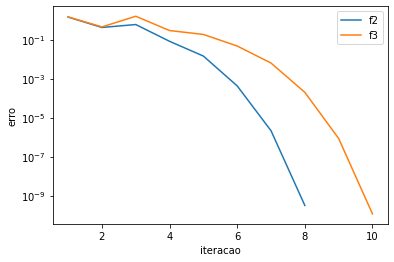

In [26]:
results_f2 = secante(f2, 0, 1)
xs_f2 = [i+1 for i in range(len(results_f2))]
results_f3 = secante(f3, 0, 1)
xs_f3 = [i+1 for i in range(len(results_f3))]
error_f2 = [abs(np.sqrt(2) -x ) for x in results_f2]
error_f3 = [abs(3**(1/3) -x ) for x in results_f3]
plt.plot( xs_f2, error_f2,label='f2')
plt.plot(xs_f3, error_f3, label='f3' )
plt.yscale('log')
plt.xlabel('iteracao')
plt.ylabel('erro')
plt.legend()
ax = plt.gca()
plt.show()

In [27]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

De que forma(s) este gráfico parece com o equivalente para o Método de Newton?

Esse gráfico possui duas semelhanças importantes com um gráfico equivalente para o método de Newton. A primeira é que conforme o número de iterações aumenta, o erro diminui, ou seja, a função converge. A segunda é que, com um aumento linear no número de iterações, temos uma diminuição exponencial do erro.

## Questão 2.4: Generalização

Agora, transforme o seu código para encontrar uma raiz de $f(x) = y$.

In [28]:
def secante_inv(f, y, x0, x1, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Encontra uma solução de  f(x) = y,  começando pelos pontos  x0 e x1,  pelo método da secante."""
    points = [x0,x1]
    iter =0
    while abs(x0-x1) > xtol and abs(f(x1)) > ytol and iter < maxiter :
      temp = x1
      passo = ((f(x1)-y)*(x1-x0))/(f(x1) - f(x0))
      x1 = x1 - passo
      x0 = temp
      points.append(x1)
      iter+=1
    return points
def sqr(x):
    return x**2

In [29]:
pts = secante_inv(sqr, 2, 0, 1)
pts_more = secante_inv(sqr, 2, 0, 1, xtol=1e-15, ytol=1e-15)

assert len(pts) < len(pts_more)
assert abs(pts[-1]**2 - 2) > abs(pts_more[-1]**2 - 2)

Explique porque estes dois testes fazem sentido.

O primeiro teste verifica se o número de iterações de pts_more foi maior, o que é de se esperar, pois é passada uma tolerância menor que a “default” e, assim, são necessárias mais iterações para função calcular uma solução boa o suficiente (ou seja, que faça o loop terminar quando ele verifica a tolerância). 

O segundo teste verifica se a solução encontrada pelo pts_more é mais próxima da real do que a encontrada pelo pts. Isso é de se esperar considerando que, como vimos antes, pts_more fez mais iterações para encontrar uma solução melhor (já que foi passado uma tolerância mínima menor na chamada de função), assim, como o método converge, é de se esperar que a solução encontrada seja mais próxima do ótimo.

In [30]:
assert len(pts_more) == len(pts) + 1

Explique porque este teste mostra a velocidade do método da secante.

Isso mostra a velocidade do método da secante, pois conseguimos um aumento exponencial da precisão(com a tolerância indo de $10^{-8}$ para a $10^{-15}$) com apenas uma iteração a mais, ou seja, uma mudança linear no numero de iteracoes gera um ganho exponencial na acurácia.

## Questão 2.5: Mais gráficos!

Para vários valores de $y$, faça em um mesmo eixo o gráfico da distância até a raiz
para o método da secante resolver $x^2 = y$, começando de $(0, 1)$.

Em particular, encontre valores de $y$ que façam que o método da secante demore (bem) mais do que para $y = 2$.

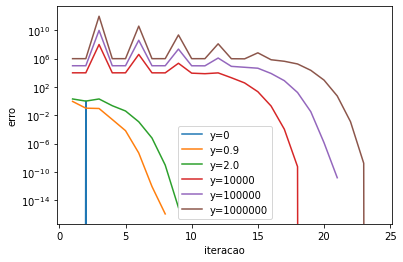

In [31]:
def f(x):
  return x**2

ys = [0, 0.9 , 2.0, 10**4, 10**5, 10**6]
for y in ys:
  result = secante_inv(f, y, 0, 1)
  xs = [i+1 for i in range(len(result))]
  error = [abs(x**2-y) for x in result]
  plt.plot( xs, error,label=f"y={y}")

plt.yscale('log')
plt.xlabel('iteracao')
plt.ylabel('erro')
plt.legend()
ax = plt.gca()
plt.show()

In [32]:
assert len(ax.lines) >= 5

In [33]:
assert len(ax.get_legend().texts) >= 5

In [34]:
xmax = max(max(l.get_xdata()) for l in ax.lines)
assert xmax >= 18

Explique o comportamento que observado.

Podemos ver que quanto maior o valor de $y$ dado, maior o número de iterações para a função convergir. Isso é esperado, pois no cálculo do passo temos $(f(x_1)-y) \cdot \frac{x_1 - x_0}{f(x_1) - f(x_0)}$, assim quanto maior o $y$ maior o valor do primeiro passado dado, dessa forma, como a raiz nao muda tanto, já que ela fica proporcional à raiz de $y$, temos que o $x_1$ a ser gerado será longe dela e, assim, fará com que a função demore mais para convergir.


## Questão 2.6: Bugs finais

Observe o código abaixo:

In [35]:
secante_inv(xex, 100, 0, 1)

[0, 1, 36.787944117144235, 1.0000000000000142, 1.0000000000000242]

Porquê o método da secante terminou longe demais de uma raiz?

Isso aconteceu, pois a função cresce de forma distinta com $0 \leq x \leq 1$ e com $x>1$, já que no primeiro caso, como $x$ ainda é menor que $1$, a exponencial não tem um efeito tão pronunciado, porém, com $x$ maior que $1$, a exponencial passa a dominar e a função cresce de forma significativamente mais rápida. Assim, quando fazemos a secante começando com os pontos $0$ e $1$, pegamos um próximo ponto distante que faz a função explodir, e então, ao calcularmos o passo, onde temos uma divisão por $f(x_1) - f(x_0)$(que será um número muito grande), esse ficará muito pequeno e a função não vai convergir.  

O que poderia ser feito para evitar este tipo de situação?

Poderíamos escolher um outro par de ponto inicial, onde o primeiro fosse pelo menos $1$(pelos motivos descritos acima), como $1$ e $2$. Fizemos esse exemplo abaixo e podemos ver que a função de fato converge.

In [36]:
value = secante_inv(xex, 100, 1, 2)
print(xex(value[-1])-100)

2.2737367544323206e-13
